# 5 СТАТИСТИЧЕСКИЕ МОДЕЛИ ДЛЯ ВРЕМЕННЫХ РЯДОВ

## Статистические методы обработки временных рядов
### Авторегрессионные модели
Авторегрессионная модель (AR) опирается на интуитивное предположение о том, что прошлое предсказывает будущее и, следовательно, описывает процесс временного ряда так, что значение в момент времени t выступает функцией значений ряда в более ранние моменты времени.
Описание авторегрессионных моделей не будет полным, если не позволить вам получить представление о том, как воспринимают такие модели и их свойства специалисты по статистике. Чтобы понять это, нужно начать с довольно длинного теоретического обоснования. Вы всегда можете его пропустить, если вам не интересны математические принципы определения свойств статистических моделей, предназначенных для описания временных рядов.


### Алгебраический расчет ограничений авторегрессионных процессов
Авторегрессия напоминает интуитивную попытку аппроксимации временного ряда, не располагая никакой другой информацией, кроме данных самого временного ряда. Именно это и подразумевает ее название: регрессия по прежним значениям для предсказания будущих значений.
Простейшая авторегрессионная модель, AR(1), описывает данные временного ряда следующим образом:  
Значение ряда в момент времени t является функцией постоянной b0, значения ряда на предыдущем временном шаге, умноженного на другую константу b1 ( ), и погрешности et, которая также изменяется со временем. Предполагается, что погрешность имеет постоянную дисперсию и нулевое среднее значение.
Обозначаем авторегрессионный член, который учитывает только непосредственно предшествующий момент времени, как AR(1), поскольку он включает в себя упреждение при сдвиге на один шаг.


### Слабая и сильная стационарность
Говоря о стационарности, мы подразумеваем слабую стационарность. А она предполагает инварианты по времени только математического ожидания и дисперсии процесса.
Сильная стационарность требует, чтобы распределение случайных величин, описывающих процесс, оставалось неизменным во времени. Например, оно требует, чтобы у статистических распределений у1, у2, у3 и у101, у102, у103 совпадали все параметры, а не только два первых показателя (математическое ожидание и дисперсия).
Забавный факт: ожидается, что сильная стационарность полностью включает случай слабой стационарности, но на практике это не совсем так. Сильная стационарность заключает в себе слабую стационарность, когда процесс можно описать терминами математического ожидания и дисперсии, но если он не характеризуется математическим ожиданием или дисперсией, то все еще может оставаться сильно стационарным, даже не являясь слабо стационарным. Классическим примером будет распределение Коши, которое имеет неопределенное математическое ожидание и бесконечную дисперсию. Процесс Коши не удовлетворяет требованиям слабой стационарности, но в полной мере соответствует требованиям сильной стационарности.
Мы изучили процесс AR(1) как самый простой авторегрессионный процесс. Наряду с этим на практике приходится иметь дело с более сложными моделями. Можно вывести равнозначные условия стационарности для процесса произвольного порядка AR(p), и существует очень много изданий, в которых показано, как это делается. Если вы хотите хорошо разобраться в этом вопросе, обратитесь к источникам, приведенным в конце главы. Главный вывод, который нужно сделать из приведенного выше обсуждения, — моделирование временных рядов не требует сложных алгебраических и статистических вычислений, а стационарность — это не просто условие возможности построения графика модели, а математическая концепция, которая отражает особенности рассматриваемой статистической модели.
Распределение — это статистическая функция, описывающая для всех возможных значений вероятность того, что конкретное значение будет сгенерировано процессом. Хотя вам, возможно, не доводилось встречаться с формальным определением этого термина, вы наверняка сталкивались с ним на практике. Например, рассмотрим колоколообразную кривую, описывающую распределение вероятностей того, что большинство наблюдений близко к среднему значению и характеризуется одинаковым отклонением по обеим сторонам. В статистике оно известно, как нормальное, или гауссово, распределение.


### Выбор параметров модели AR(p)
Чтобы оценить уместность модели AR для своих данных, начните с построения графика процесса и его функции частичной автокорреляции (Partial Autocorrelation Function — PACF). Функция PACF процесса AR срезается к нулю за пределами порядка р процесса AR(p), тем самым явным образом обозначая порядок процесса.
С другой стороны, функция автокорреляции (Autocorrelation Function — ACF) процесса AR не является столь информативной, хотя и имеет характерную форму, демонстрируя экспоненциальное падение с увеличением временного сдвига.


Рассмотрим некоторые фактические данные о прогнозировании спроса, заимствованные из хранилища UCI Machine Learning (https://perma.cc/B7EQ-DNLU).

In [1]:
install.packages("data.table")
library(data.table)
require (data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
demand  <- fread("BankingOrders.csv")
demand

"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291


In [3]:
fit <- ar(demand [[ "Banking orders (2)"]], method = "mle")
fit


Call:
ar(x = demand[["Banking orders (2)"]], method = "mle")

Coefficients:
      1        2        3  
-0.1360  -0.2014  -0.3175  

Order selected 3  sigma^2 estimated as  1.414e+09

В документации к функции ar() указано, что возвращаемый порядок определяется (для параметров по умолчанию, которые нами не изменялись) по информационному критерию Акайке (AIC). Это очень важный момент: визуальная оценка, выполненная при изучении функции PACF, полностью согласуется с полученной в результате минимизации информационного критерия. Это два разных способа определения порядка модели, но в данном случае они возвращают согласованный результат.

#### Информационный критерий Акаике
Значение AIC для модели рассчитывается как AIC = 2k  21nL, где к — количество параметров модели, a L — значение максимального правдоподобия функции. Как правило, требуется уменьшить сложность модели (значение параметра к), одновременно увеличивая правдоподобие/точность подгонки модели (параметра L).
Поэтому предпочтение отдается моделям с меньшими значениями AIC перед моделями с более высокими значениями AIC.
Функция правдоподобия — это мера того, насколько вероятен конкретный набор параметров для функции относительно других параметров этой функции для заданных данных. Представьте, что вы строите модель линейной регрессии значений у от х для следующего набора данных.
Если применить к таким данным модель у = b  х, то функция правдоподобия покажет, что оценка b = 1 гораздо более вероятна, чем b = 0. Функции правдоподобия можно рассматривать как инструмент определения наиболее вероятных истинных параметров модели для заданного набора данных.
Обратите внимание на то, что функция ar() также возвращает коэффициенты модели. При необходимости коэффициенты можно ограничить. Например, изучая функцию PACF, задайтесь вопросом, действительно ли нужно включить коэффициент для члена lag - 1 или его лучше обнулить, учитывая, что соответствующее значение PACF значительно ниже уровня значимости. В этом случае можно также использовать функцию arima() пакета stats.
Ниже описана процедура вызова функции аппроксимации процесса AR(3) при установке параметра порядка с (3, 0, 0), где 3 указывает порядок AR-компонента (компоненты других порядков будут описаны далее при рассмотрении примеров разностной модели и модели скользящего среднего).


In [4]:
est <- arima(x = demand[["Banking orders (2)"]], order = c(3, 0, 0))
est



Call:
arima(x = demand[["Banking orders (2)"]], order = c(3, 0, 0))

Coefficients:
          ar1      ar2      ar3  intercept
      -0.1358  -0.2013  -0.3176  79075.350
s.e.   0.1299   0.1289   0.1296   2981.124

sigma^2 estimated as 1.414e+09:  log likelihood = -717.42,  aic = 1444.83

Чтобы внедрить в модель априорное знание или мнение, нужно положить коэффициент равным нулю. Например, чтобы ограничить модель нулевым значением члена lag - 1, нужно использовать следующий код.

In [5]:
est.l <- arima (x = demand[["Banking orders (2)"]],
order = c(3, 0, 0),
fixed = c(0, NA, NA, NA) )
est.l

Warning message in arima(x = demand[["Banking orders (2)"]], order = c(3, 0, 0), :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = demand[["Banking orders (2)"]], order = c(3, 0, 0), fixed = c(0, NA, 
    NA, NA))

Coefficients:
      ar1      ar2      ar3  intercept
        0  -0.1831  -0.3031  79190.705
s.e.    0   0.1289   0.1298   3345.253

sigma^2 estimated as 1.44e+09:  log likelihood = -717.96,  aic = 1443.91

Передавая значение в векторной форме как фиксированный параметр функции arima, нужно установить его равным 0, а не NA, чтобы правильно задать ограничение.

In [6]:
fixed <- c(0, NA, NA, NA)

Теперь проверим точность модели на обучающих данных для оценки соответствия модели исходному набору данных. Мы можем сделать это двумя способами. Начнем с построения функции ACF для невязок (т.е. ошибок), чтобы увидеть, существует ли модель самокорреляции, которую не учитывает наша модель. Построить график невязок довольно просто — достаточно воспользоваться результатом функции arima().

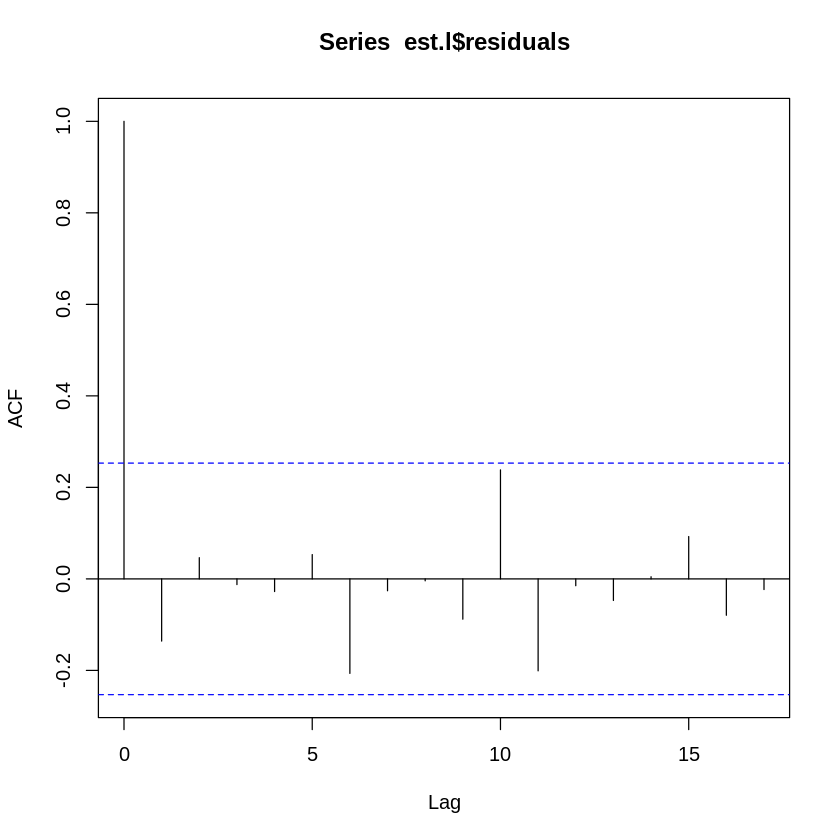

In [7]:
acf(est.l$residuals)

на графике - ACF для невязок в модели AR(3) при аппроксимации с обнуленным параметром lag - 1

Ни одно из значений функции ACF не пересекает порог значимости. Конечно, мы не должны слепо ориентироваться на пороговое значение при определении или опровержении значимости, но оно оказывается полезным при оценке модели, которая считается правдоподобной по другим критериям.
В данном случае нам не удалось обнаружить самокорреляцию среди невязок (т.е. ошибок). В случае ее выявления нам пришлось бы пересмотреть исходную модель, рассмотрев возможность включения в нее дополнительных членов для учета большей части автокорреляции невязок.
Другой распространенный тест — это критерий Лъюнга-Бокса (Ljung-Box), проверяющий случайность временного ряда. Точнее говоря, этот критерий устанавливает справедливость нулевой и альтернативной гипотез.
• Н0: данные не демонстрируют последовательную корреляцию.
• Н1: данные демонстрируют последовательную корреляцию.
Такой тест обычно применяется к AR-моделям (и в более общем смысле – к моделям ARIMA), а точнее — к невязкам оценки соответствия модели, а не самой модели.

In [8]:
Box.test(est.l$residuals, lag = 10, type = "Ljung", fitdf = 3)


	Box-Ljung test

data:  est.l$residuals
X-squared = 9.3261, df = 7, p-value = 0.2301


Применим тест Льюнга-Бокса к модели est.1, чтобы оценить точность аппроксимации. Мы не можем отвергнуть нулевую гипотезу о том, что данные не демонстрируют последовательную корреляцию. Это подтверждает результат, полученный при изучении графика ACF для невязок.

#### Прогнозирование с помощью процесса AR(p)
Далее будет показано, как составлять прогнозы с помощью AR-процессов. Сначала рассмотрим случай прогнозирования на один временной шаг вперед, а затем обсудим повышение уровня сложности прогнозирования на несколько шагов вперед. Хорошая новость заключается в том, что с точки зрения программирования обе задачи решаются одинаково, но в последнем случае объем вычислений намного больше.
Прогнозирование на один шаг вперед. Сначала рассмотрим случай прогнозирования на один шаг вперед с помощью известной (оценочной) AR-модели. В этом случае мы располагаем всей необходимой информацией.
Продолжим работать с моделью на основе данных о банковских переводах с коэффициентом lag - 1, равным 0 (подбирается так же, как в модели est.1). Построим прогноз, используя функцию fitted() пакета forecast. Ниже приведен полный код решения.


In [9]:
install.packages("forecast")
library(forecast)
require(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



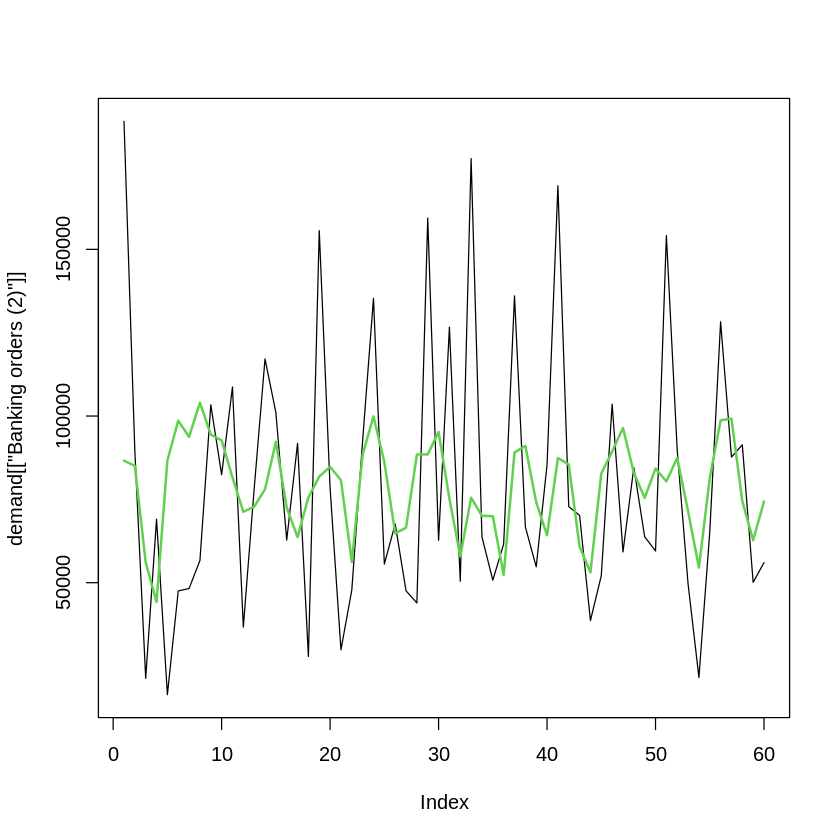

In [10]:

plot(demand [[ "Banking orders (2)"]], type = 'l')
lines(fitted (est.l), col = 3, lwd = 2) ## используем пакет forecast


#### АR(р)-модели и функции скользящего окна
При прогнозировании нашей модели AR(3) можно отказаться от встроенной функции пакета forecast — вместо нее можно применять описанную ранее функцию rollapply(), позволяющую составлять более точные прогнозы. Эта оконная функция прекрасно справляется с моделированием AR-процессов. Чтобы построить прогноз в каждой точке, нужно заимствовать коэффициенты из функции ar() и использовать их в качестве весов входного вектора, представляющего значения отдельных сдвигов. Оставим эту задачу на ваше рассмотрение.
Теперь давайте задумаемся о точности прогноза. Вычислив корреляцию между прогнозируемым и фактическим значениями, получим значение 0,29. В некоторых случаях это достаточно неплохой результат, но не забывайте, что разностный метод часто опровергает существование, казалось бы, устойчивых связей в таких данных в пользу случайных зависимостей.
В частности, это имеет место в не полностью стационарных данных, для аппроксимации которых применяется очень точная модель, маскирующая нераспознанный тренд, который следовало найти и изучить моделированием.
Будем рассчитывать разности как между значениями ряда, так и между прогнозируемыми значениями, чтобы увидеть, насколько хорошо модель предсказывает переход от одного периода времени к другому. Даже после вычисления разностей результат прогнозирования и исходные данные демонстрируют схожие закономерности, что указывает на правдоподобность используемой модели.


#### Прогнозирование на много шагов вперед.
До настоящего момента мы составляли прогноз всего на шаг вперед. Тем не менее часто требуется предсказать данные для более отдаленного периода времени. Сначала давайте представим, как можно сделать прогноз на два, а не на один, шага вперед. Очевидным будет решение, в котором сначала делается прогноз на один шаг вперед, а затем на основе полученного значения уt строится прогноз значения уt+1.
Обратите внимание на то, что в нашей текущей модели переход от прогноза на один шаг вперед к прогнозу на два шага вперед фактически не требуется выполнения таких действий, поскольку значение уt-1 не принимает участия в прогнозировании значения уt . Все, что нужно знать для составления прогноза на два временных шага вперед, нам известно, и в угадывании данных нет особой необходимости. В действительности мы можем обойтись тем же рядом значений, что и при составлении прогноза на шаг вперед, — новых источников ошибок или изменчивости данных не наблюдается.
Однако если требуется прогнозировать более отдаленное будущее, то в качестве входных данных придется использовать сгенерированные будущие значения.
Посмотрим, как можно спрогнозировать значение уt+3. Используемая модель предполагает расчет коэффициентов, зависящих от значений уt+1 и уt. Таким образом, сначала нам нужно предсказать оба этих значения — уt+1 и уt., - а затем по очереди использовать полученные оценочные значения для прогнозирования значения уt+3. Как и прежде, воспользуемся для этого функцией fitted() пакета forecast. С точки зрения программирования такая задача не намного сложнее составления прогноза на один шаг вперед. Как упоминалось ранее, прогноз также можно получить с помощью метода rollapply(), но он имеет более высокую вычислительную сложность и подверженность ошибкам.
Воспользуемся функцией fitted() с дополнительным параметром h для установки горизонта прогнозирования. Напомним, что объект est.1 представляет процесс AR(3) с коэффициентом lag - 1 (время минус 1), приравненным к нулю.


In [11]:
fitted(est.l)

A Time Series:
 [1]  86598.68  85060.12  56078.02  44204.85  86677.79  98592.36  93759.43
 [8] 104018.70  94452.02  92688.13  81589.53  71273.26  72812.24  78022.74
[15]  92261.97  72556.50  63686.50  75567.32  81853.01  84770.94  80750.12
[22]  56174.38  88467.93  99888.38  86233.48  64818.36  66502.35  88465.38
[29]  88490.42  95234.16  75195.37  57901.02  75491.94  70077.16  69954.48
[36]  52311.71  89092.00  91029.77  74115.30  64240.01  87434.62  85459.10
[43]  60853.28  53105.38  82763.66  89343.12  96438.65  82934.58  75457.17
[50]  84257.72  80386.23  87465.75  71429.63  54546.83  81414.68  98697.42
[57]  99217.05  74444.42  62755.17  74379.35

In [12]:
var(fitted(est.l, h = 3) , na.rm = TRUE)

[1] 174870141

In [13]:
var(fitted(est.l, h = 5) , na.rm = TRUE)

[1] 32323722

In [14]:
var(fitted(est.l, h = 10) , na.rm = TRUE)

[1] 1013396

In [15]:
var(fitted(est.l, h = 20), na.rm = TRUE)

[1] 1176.689

In [16]:
var(fitted(est.l, h = 30) , na.rm = TRUE)

[1] 3.388713

Прогнозы на более длительные периоды времени в будущем строятся преимущественно на математическом ожидании процесса, что вполне обосновано.

В какой-то момент времени в отдаленном будущем текущие данные перестанут предоставлять информацию о будущих изменениях, а прогнозирование будет сводиться к преимущественному изучению таких базовых статистических характеристик процесса, как математическое ожидание.
Из этого можно сделать важный вывод о том, что модели AR (а также МА, ARMA и ARIMA, о которых вы узнаете в последующих разделах) лучше всего подходят для краткосрочного прогнозирования. Они теряют предсказательную силу для отдаленных горизонтов в будущем.
При рассмотрении остальных моделей мы будет придерживаться такого же плана действий, как и в случае авторегрессионной модели, хотя и с меньшей степенью детализации процесса. Полное описание рассматриваемых далее методик приведено в узкоспециализированных учебниках по анализу временных рядов (список приводился ранее).


#### Модели скользящего среднего (ма)
Модель скользящего среднего (Moving Average — МА) предназначена для описания процессов, в которых значение в каждой отдельной временной точке является функцией недавних компонентов “ошибок”, каждая из которых не зависит от других. Давайте рассмотрим модель скользящего среднего согласно такой же процедуре, что и при изучении авторегрессионной модели.
#### Сходство моделей AR и МА
Во многих случаях процесс МА можно представить через AR-процесс бесконечного порядка. И наоборот, очень часто AR-процесс представляется как процесс МА бесконечного порядка.

#### Подбор параметров процесса MA(q)
Построим модель МА на тех же данных, которые применялись при описании модели AR, используя функцию ACF для определения порядка процесса МА. Перед тем как продолжить, попробуйте разобраться в том, как работает модель МА, и объяснить, почему для определения порядка процесса применяется функция ACF, а не РАСЕ


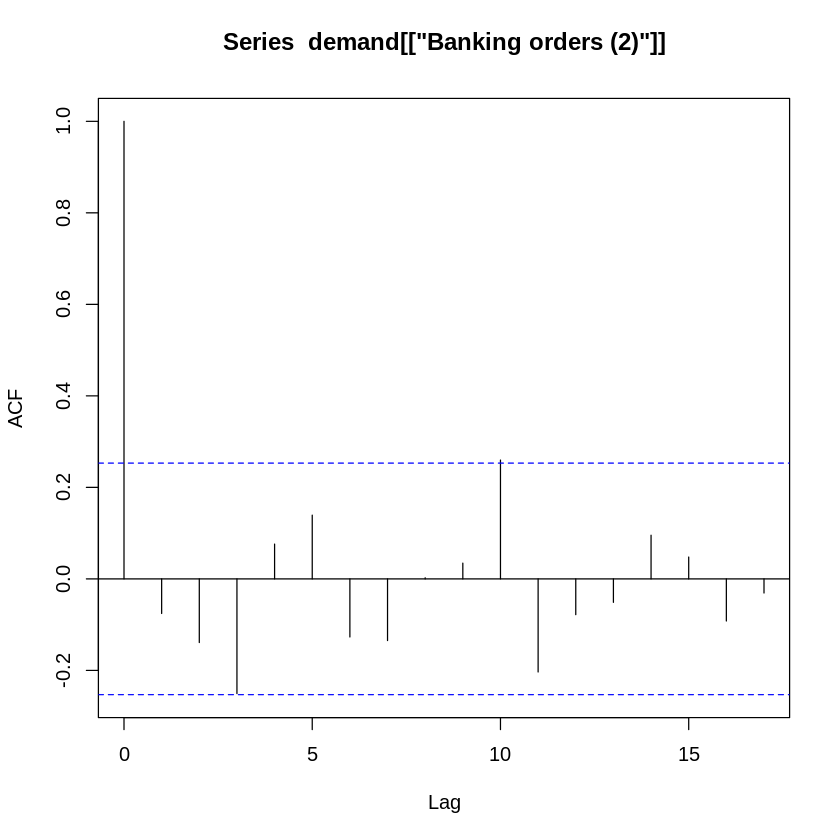

In [17]:
acf(demand[["Banking orders (2)"]])

### Шаблоны ACF и PACF различаются в процессах МА и AR
В отличие от авторегрессионного процесса, который характеризуется медленно убывающей ACF, процессу МА свойственно резкое обнуление ACF при любом значении порядка, превышающем q. Это связано с тем, что авторегрессионный процесс зависит от предыдущих членов, а они учитывают предыдущие импульсы в системе, в то время как модель МА, учитывающая импульсы непосредственно по их значениям, обладает механизмом предотвращения бесконечного влияния.
Наиболее значимые величины наблюдаются в сдвигах 3 и 9, поэтому будем подгонять модель МА именно к ним. Нужно проявить осторожность, чтобы случайно не обнулить не те коэффициенты, для чего выводим их на экран.


In [18]:
ma.est = arima(x = demand[["Banking orders (2)"]], order = c(0, 0, 9),
fixed = c(0, 0, NA, rep (0 , 5), NA, NA))
ma.est


Call:
arima(x = demand[["Banking orders (2)"]], order = c(0, 0, 9), fixed = c(0, 0, 
    NA, rep(0, 5), NA, NA))

Coefficients:
      ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8      ma9  intercept
        0    0  -0.4725    0    0    0    0    0  -0.0120  79689.809
s.e.    0    0   0.1459    0    0    0    0    0   0.1444   2674.593

sigma^2 estimated as 1.4e+09:  log likelihood = -717.31,  aic = 1442.61

Кроме того, нужно проверить точность аппроксимации, как это делалось для модели AR, построив график ACF для невязок модели. В качестве дополнительной, дублирующей проверки точности модели применим к невязкам тест Льюнга-Бокса для оценки общей стохастичности в каждой аппроксимации. Обратите внимание, что при передаче данных в функцию Box.test () необходимо указать количество степеней свободы — число параметров модели, подлежащих свободной оценке — не ограниченных определенным значением. В нашем случае свободными параметрами считаются сдвиг, а также члены МА3 и МА9.

In [19]:
Box.test(ma.est$residuals, lag = 10, type = "Ljung", fitdf = 3)


	Box-Ljung test

data:  ma.est$residuals
X-squared = 7.6516, df = 7, p-value = 0.3643


Мы не можем отвергнуть нулевую гипотезу об отсутствии временной корреляции между точками невязок. При всем этом график ACF невязок не демонстрирует никакой временной корреляции (пусть это будет упражнением для домашнего выполнения).

#### Прогнозирование с помощью процесса MA(q)
Повторим прогноз на тех же исходных данных, придерживаясь методик, которые были продемонстрированы для AR-процесса, и полагаясь на метод fitted() пакета forecast.


In [20]:
fitted(ma.est, h=1)

A Time Series:
 [1]  90116.64  80626.91  74090.45  38321.61  74734.77 101153.20  65930.90
 [8] 106351.80 104138.05  86938.99 102868.16  80502.02  81466.01  77619.15
[15] 100984.93  81463.10  61622.54  79660.81  88563.91  65370.99 104679.89
[22]  48047.39  73070.29 115034.16  80034.03  70052.29  70728.85  90437.86
[29]  80684.44  91533.59 101668.18  42273.27  93055.40  68187.65  75863.50
[36]  40195.15  82368.91  90605.60  69924.83  54032.55  90866.20  85839.41
[43]  64932.70  43030.64  85575.32  76561.14  82047.95  95683.35  66553.13
[50]  89532.20  85102.64  80937.97  93926.74  47468.84  75223.67 100887.60
[57]  92059.32  84459.85  67112.16  80917.23

Модели MA характеризуются сильной реверсивностью математического ожидания, поэтому прогнозы быстро сходятся к математическому ожиданию процесса. Это обосновано тем, что процесс считается функцией белого шума. Результатом прогнозирования вне пределов диапазона модели, определяемого ее порядком, неизбежно будет математическое ожидание процесса, что исходит из его определения

#### Общепринятая форма записи — со знаком "минус"
Обратите внимание, что математическое определение модели МА обычно записывается не так, как показано выше. Обычно перед коэффициентами q указывается знак "минус". В нашем случае это объясняется другой интерпретацией модели МА, состоящей в том, что модель МА — это AR-модель с ограниченными параметрами.
Эта формулировка в результате довольно сложных преобразований приводит к получению отрицательных коэффициентов q.
Мы можем убедиться в этом, составив прогноз на 10 временных шагов вперед с помощью только что полученной модели МА(9).


In [21]:
fitted (ma.est, h=10)

A Time Series:
 [1]       NA       NA       NA       NA       NA       NA       NA       NA
 [9]       NA       NA 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[17] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[25] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[33] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[41] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[49] 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81 79689.81
[57] 79689.81 79689.81 79689.81 79689.81

### Интегрированная модель авторегрессии скользящего среднего
После отдельного изучения моделей AR и МА перейдем к модели интегрированной
модели регрессии скользящего среднего (ARIMA — Autoregressive Integrated Moving Average), в которой учитывается тот факт, что одни и те же временные ряды могут проявлять базовую динамику процессов как AR, так и МА. Уже один этот факт приводит к модели ARMA, но мы расширим AR до модели ARIMA, предполагающей вычисление разностей, учет трендов и обработку нестационарных временных рядов.
Модели ARIMA по-прежнему обеспечивают точность, близкую к современному уровню, особенно на небольших наборах данных, на которых более сложные модели машинного обучения или глубокого обучения выглядят не наилучшим образом. Однако даже модели ARIMA подвержены опасности чрезмерной подгонки, несмотря на их относительную простоту.
#### Вычисление разностей.
Как обсуждалось ранее, вычисление разностей — это операция преобразования временного ряда значений во временной ряд изменений значений во времени. Чаще всего это достигается путем вычисления парных разностей значений для смежных временных точек, так что значение разностного ряда в момент времени t представляется как разница между значениями в моменты времени t и t - 1 исходного ряда. Однако при необходимости разности можно вычислять для любых временных сдвигов.
#### Определение модели
Вам может показаться странной аппроксимация одних и те же данных с помощью моделей AR и МА без указания причин такого решения. С таким несколько раздражающим подходом вы можете столкнуться во многих источниках по анализу временных рядов. Одни авторы, превозмогая лень, стараются использовать при описании разных моделей несколько различающиеся наборы данных, в то время как другие нарочито отказываются от такого подхода. Ранее мы не проверяли, какая из моделей лучше аппроксимирует исходные данные, но в процессе их изучения выяснили, что в разных условиях существуют предпосылки к использованию для описания данных каждой из моделей (AR и МА). Возникает вопрос: не стоит ли объединить их в одну модель?
Чтобы понять, какая из моделей — AR, МА или ARMA — лучше всех подходит для анализа временных рядов, обратимся к таблице.
#### Лучшая модель для описания временного ряда
Совмещение моделей AR и МА приводит к получению модели авторегрессионного скользящего среднего (ARMA — Autoregressive Moving Average), которая применяется в случаях, когда ни AR, ни МА не позволяет описать наблюдаемую динамику временного ряда с достаточной степенью точности. Довольно часто при определении порядковых статистик процессов AR и МА (PACF и ACF соответственно) можно получить ненулевые значения, указывающие на порядок модели AR или МА. Их можно успешно применять в модели ARMA.
#### Теорема Вольда
Теорема Вольда утверждает, что каждый ковариационно-стационарный временной ряд можно представить, как сумму двух временных рядов — детерминированного и стохастического. Основываясь на этой теореме, можно показать, что стационарный процесс можно вполне обоснованно аппроксимировать моделью ARMA, хотя найти подходящую модель зачастую очень трудно.
Перейдем к рассмотрению математической формы записи модели ARMA, традиционно предваряя коэффициенты процесса МА знаками “минус”:


### Модель ARMA не единственно возможная
Если у компонентов AR и МА представленного выше уравнения наблюдаются общие множители, то модель ARMA(p, q) можно свести к другому набору параметров. В общем случае необходимо избегать такого рода вырожденных ситуаций.
Старайтесь всегда выбирать самую простую модель ARMA. Дальнейшее обсуждение выходит за рамки материала курса, но с ним вы можете детально познакомиться в дополнительных источниках.
Один из способов выявления ситуаций, в которых могут наблюдаться такого рода трудности, — запись уравнения модели ARMA через оператор запаздывания (обсуждался ранее) и его полиномиальное разложение для поиска общих множителей в компонентах AR и МА, которые можно сократить, чтобы получить эквивалентную, но более простую модель. Рассмотрим пример. Один из способов представления уравнения модели ARMA состоит в разнесении компонентов AR и МА по разные стороны знака равенства.
Рассмотрим следующую модель ARMA:
![image.png](attachment:image.png)
Уравнение можно переписать так, что члены модели AR (коэффициенты х) будут размещаться по одну, а члены МА — по другую сторону равенства:
![image-2.png](attachment:image-2.png)
Теперь перепишем его с использованием оператора запаздывания. Так, например, ![image-4.png](attachment:image-4.png) 2 будет заменено на ![image-3.png](attachment:image-3.png):
![image.png](attachment:image.png)
Выделив общие множители у члена у в левой и члена et в правой части уравнения, разложим его на множители:
(1 + 0,3L)(l - 0,8L) = (1 + 0,3L)(l + 0,3L)et.
Обратите внимание на то, что при разложении на множители значения, на которые действует оператор запаздывания, записываются справа от него, чтобы выделять значения уt, находящиеся справа от полиномиальных множителей, включающих оператор L, а не слева, что может показаться более естественным.
Выполнив факторизацию, легко обнаружить общий множитель в левой и правой частях уравнения, а именно (1 + 0,3 L), который нужно сократить:
(l - 0,8L) = (1 + 0,3L)et.
В результате выполнения описанных выше операций мы понизили порядок модели  — теперь она включает значения только для момента времени t - 1, но не t - 2. Это указывает на то, что даже модель, которая не кажется слишком сложной, такая как ARMA(2, 2), может быть эквивалентна более простой модели, но это становится очевидным только после ее детального изучения.
Также не забывайте о возможности непосредственной аппроксимации моделей. Реальные наборы данных часто описываются уравнениями, в которых обе части численно близки, но не совпадают. Например, в левой части уравнения может располагаться такой множитель, как (1 - 0,29L), а в его правой части — множитель (1 – 0,33L). В подобных случаях стоит воспользоваться близостью множителей для уменьшения сложности модели.
Стационарность процесса ARMA обусловливается стационарностью его компонента AR и описывается тем же характеристическим уравнением, которое используется для определения стационарности модели AR.
От модели ARMA легко перейти к модели ARIMA. Различие между этими моделями проявляется в их названиях — аббревиатура “ARIMA” включает дополнительную букву “I”, обозначающую понятие integrated (интегрированная), которое показывает, сколько раз следует вычислить разность, чтобы получить стационарный временной ряд.
Модели ARIMA находят более широкое практическое применение, чем модели AR, МА и ARMA, особенно в научных исследованиях и прогнозировании.
Поиск в базе Google Scholar показывает, что ARIMA используется для решения самых разных задач прогнозирования, включая такие:
• прогнозирование потока авиапассажиров, прибывающих на Тайвань;
• прогнозирование объемов энергопотребления Турции по разным видам топлива;
• прогнозирование ежедневных объемов продаж овощного рынка Индии;
• прогнозирование потребности в пунктах неотложной помощи на Западном побережье США.
Важно отметить, что порядок вычисления разностей не должен быть слишком большим. В общем случае значение каждого параметра ARIMA(p, d, q) нужно минимизировать, чтобы избежать необоснованной сложности модели и чрезмерной подгонки к выборочным данным. Существует универсальное эмпирическое правило: следует предельно осторожно относиться к значениям d больше 2 и значениям р и q больше 5. Кроме того, наибольшим должен быть параметр р или q, и меньший из них должен быть относительно небольшим. Впрочем, эти рекомендации носят сугубо практический характер и не имеют точного математического обоснования.


#### Выбор параметров
Модель ARIMA описывается тремя параметрами (p, d, q). Значения p, d, q выбираются согласно имеющемуся набору данных.
Приведем несколько общеизвестных примеров модели ARIMA, описанных в Википедии.
• ARIMA(0,0,0) — модель белого шума.
• ARIMA(0,1,0) — модель случайного блуждания, a ARIMA(0,1,0) с ненулевой константой — модель случайного блуждания со смещением.
• ARIMA(0,1,1) — модель экспоненциального сглаживания.
• ARIMA(0,2,2) — то же, что и линейный метод Хольта, в котором модель экспоненциального сглаживания расширяется на данные с трендом. В результате ее можно использовать для прогнозирования данных, включающих тренд.
Порядок модели выбирается, исходя из знаний о предметной области, значений оцениваемых критериев (таких, как AIC) и сведений о поведении функций PACF и ACF для исследуемого процесса. Давайте попробуем настроить модель ARIMA как вручную, используя сведения о функциях PACF и ACF, так и автоматически — с помощью программных инструментов выбора параметров модели, — в частности функции auto.arima() пакета forecast.
Подгонка модели вручную. Для подбора параметров ARIMA вручную применяются вычислительные методики, в которых основным оцениваемым фактором является простота модели. Одна из самых старых, но до сих пор популярных из них — это модель Бокса-Дженкинса, представляющая собой итерационный многошаговый процесс.
1. Используйте исследуемые данные, имеющиеся графики и знания о предметной области для выбора класса модели, подходящей для описания данных.
2. Оцените параметры модели на обучающих данных.
3. Оцените точность модели на основе обучающих данных и подберите параметры модели так, чтобы устранить недостатки, выявленные при оценке точности.

Рассмотрим следующий пример подгонки модели. Для начала нам нужно определиться с исходными данными. Для лучшего понимания, а также для сверки полученного результата с правильным ответом заимствуем данные из процесса ARMA.


In [25]:
set.seed (1017)
## Порядок модели ARIMA скрыт преднамеренно
y = arima.sim(n = 1000, list(ar = c(0.8897, -0.4858), ma = c(-0.2279, 0.2488)))

He нужно подсматривать порядок созданной модели; давайте сосредоточимся на самостоятельном его определении. Сначала необходимо построить временной ряд, изучить его и убедиться в том, что он стационарный (рис. 5.8). Затем нужно проанализировать ACF и PACF для ряда у (рис. 5.9) и сравнить полученные сведения с данными, приведенными в таблице.
![image.png](attachment:image.png)
Рис. 5.8. График временного ряда

Как легко заметить, ни ACF, ни PACF y, не имеют явно выраженного резкого обрыва, что позволяет (см. таблицу) описать исследуемый процесс с помощью модели ARMA.

![image-2.png](attachment:image-2.png)
Рис. 5.9. Функции ACF и PACF для временного ряда

Начнем подгонку с изучения относительно простой модели ARIMA(1,0,1), в которой не вычисляются разности значений ряда и не учитываются тенденции.

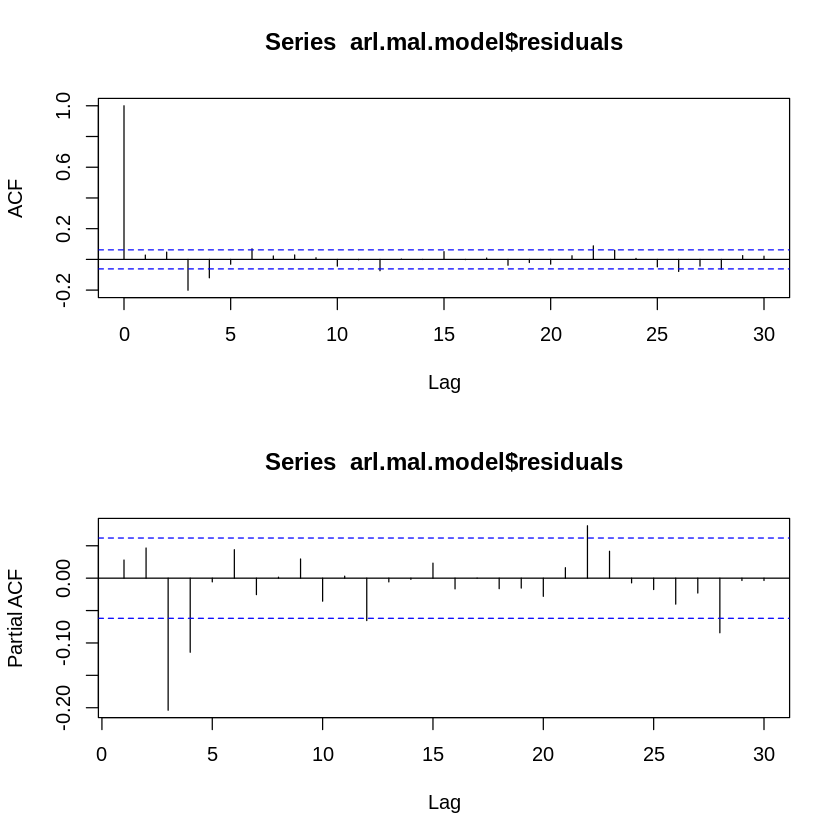

In [23]:
arl.mal.model = Arima(y, order = c(1,0,1))
par(mfrow = c(2,1))
acf(arl.mal.model$residuals)
pacf(arl.mal.model$residuals)

Таким образом, нам нужно включить в модель компонент AR более высокого порядка. В следующем коде тестируется модель ARIMA(2,0,1) и строятся графики ACF и PACF для невязок улучшенной, более сложной модели.

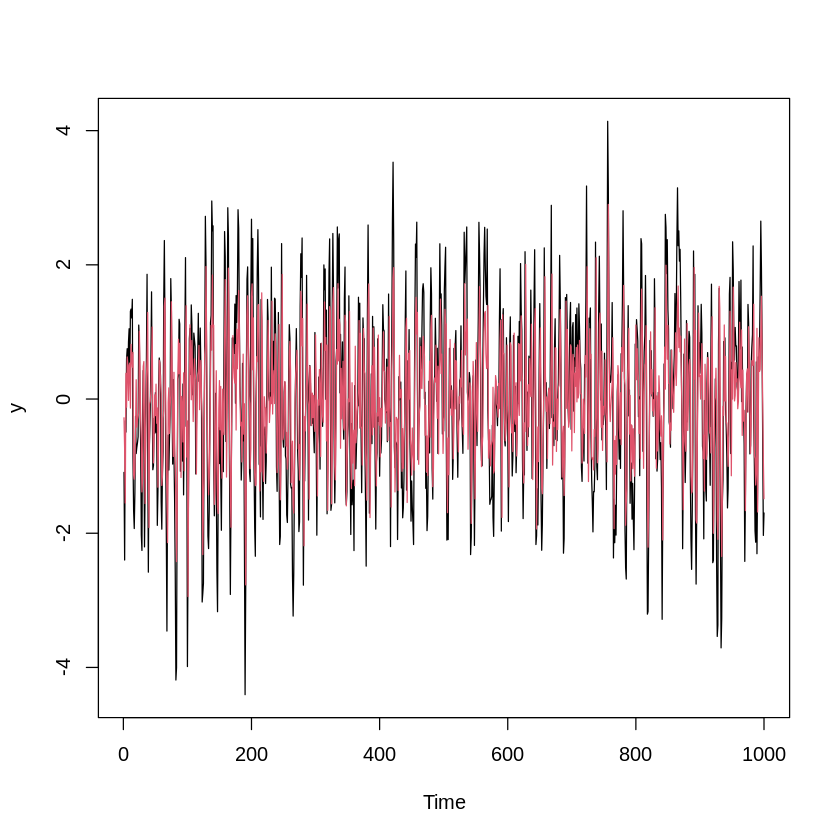

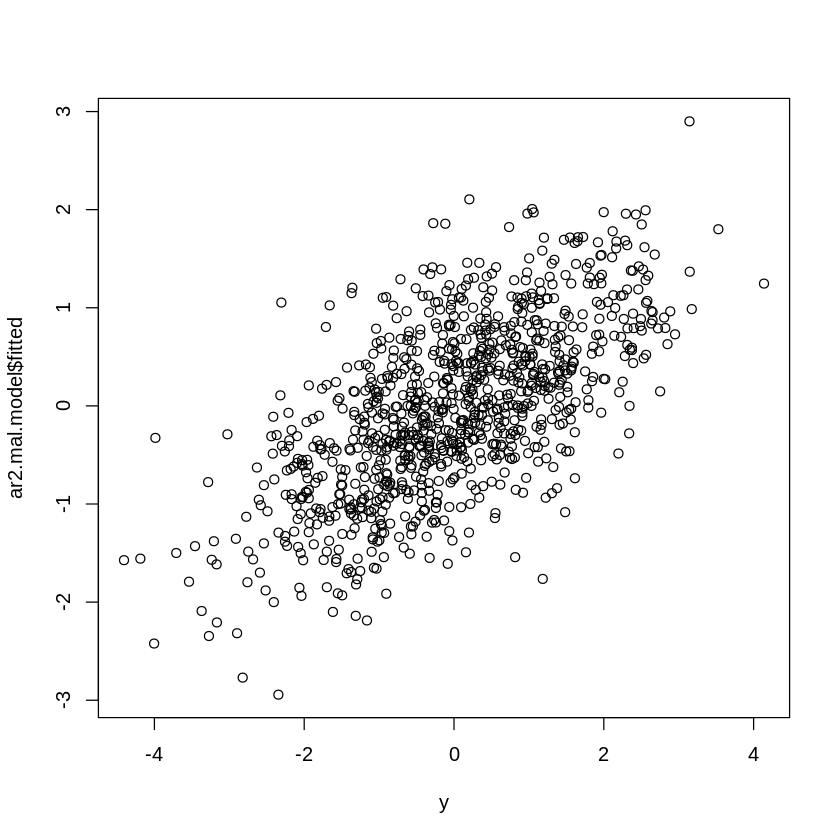

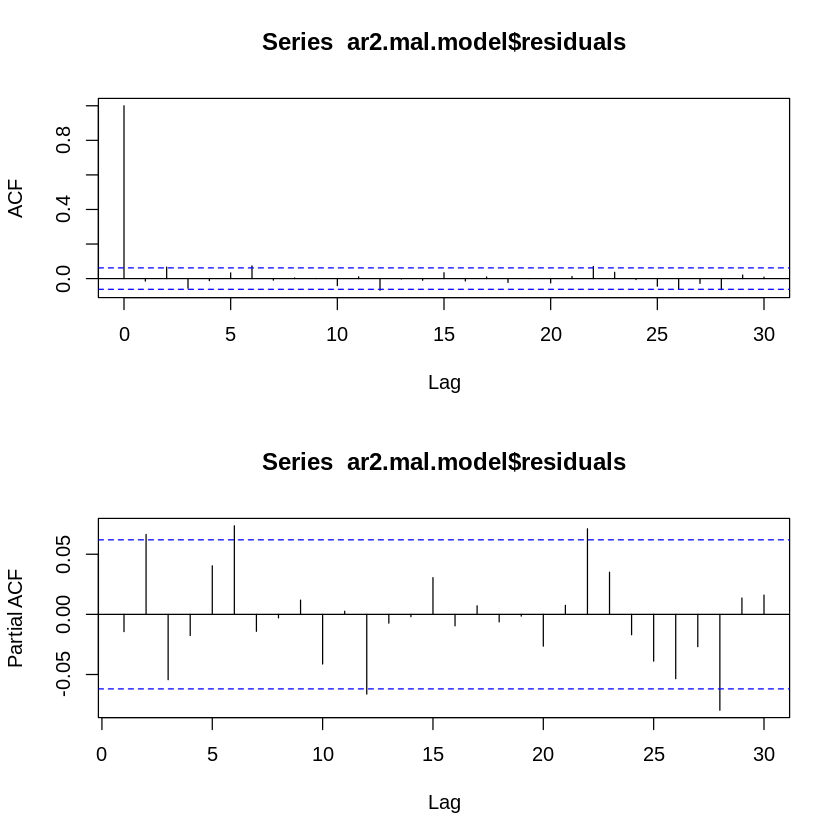

In [27]:
ar2.mal.model = Arima(y, order = c(2, 0, 1))
plot(y, type = 'l')
lines(ar2.mal.model$fitted, col = 2)
plot(y, ar2.mal.model$fitted)
par(mfrow = c(2,1))
acf(ar2.mal.model$residuals)
pacf(ar2.mal.model$residuals)


Невязки уже не демонстрируют больших отклонений ни в ACF, ни в РАСЕ Учитывая требование получить как можно более простую модель ARIMA и избежать чрезмерной ее подгонки, дальнейшие изыскания можно прекратить, поскольку здесь невязки не демонстрируют поведения, которое нужно учитывать с помощью дополнительного авторегрессионного, скользящего среднего или разностного компонента модели. Вы всегда можете выполнить такое упражнение самостоятельно, рассмотрев возможность построения более сложных моделей

Хотя и без демонстрации графиков здесь, я все же протестировала более сложную модель с помощью следующего кода. Полученный результат показал, что точность модели заметно не повысилась для тех же исходных данных, а значения ACF или PACF не уменьшились на большую величину, чем в предыдущей модели. При желании убедитесь в этом самостоятельно.

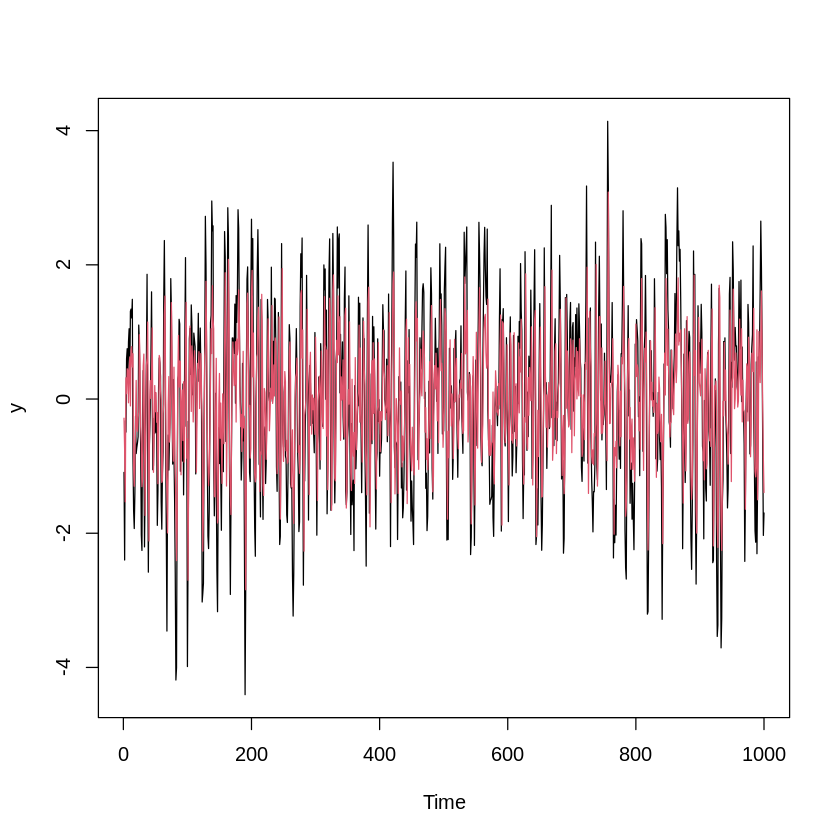

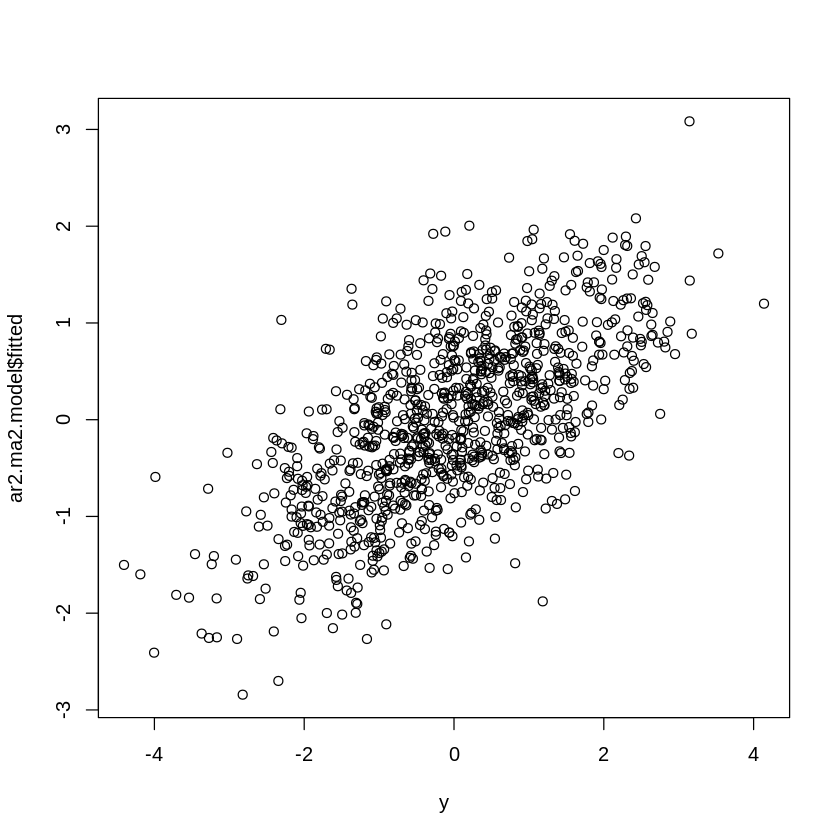

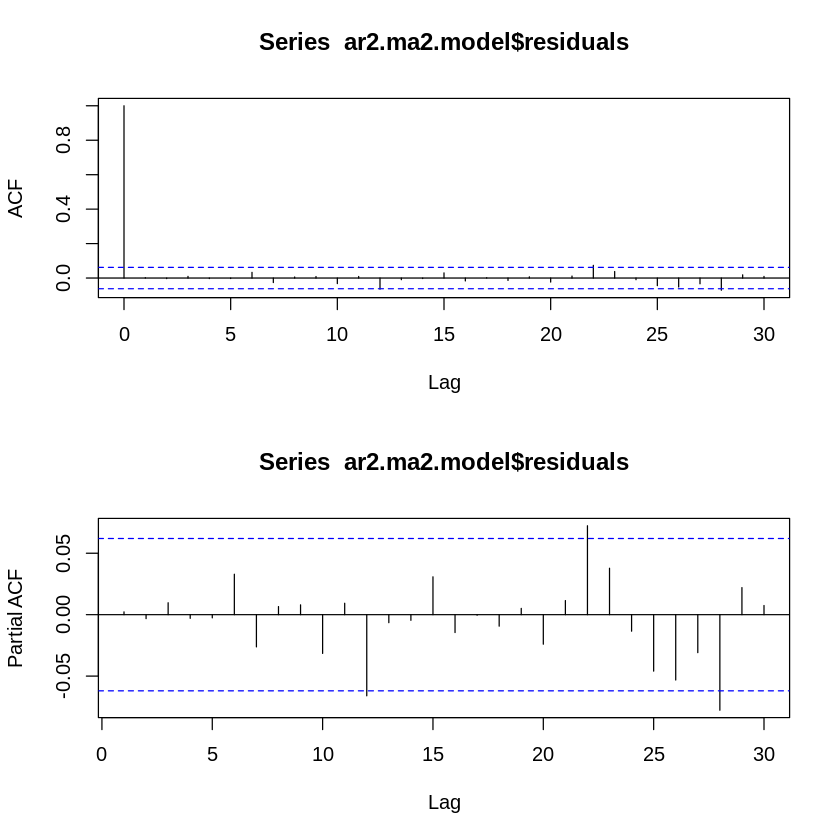

Warning message in par(mf.row = c(2, 1)):
“"mf.row" is not a graphical parameter”


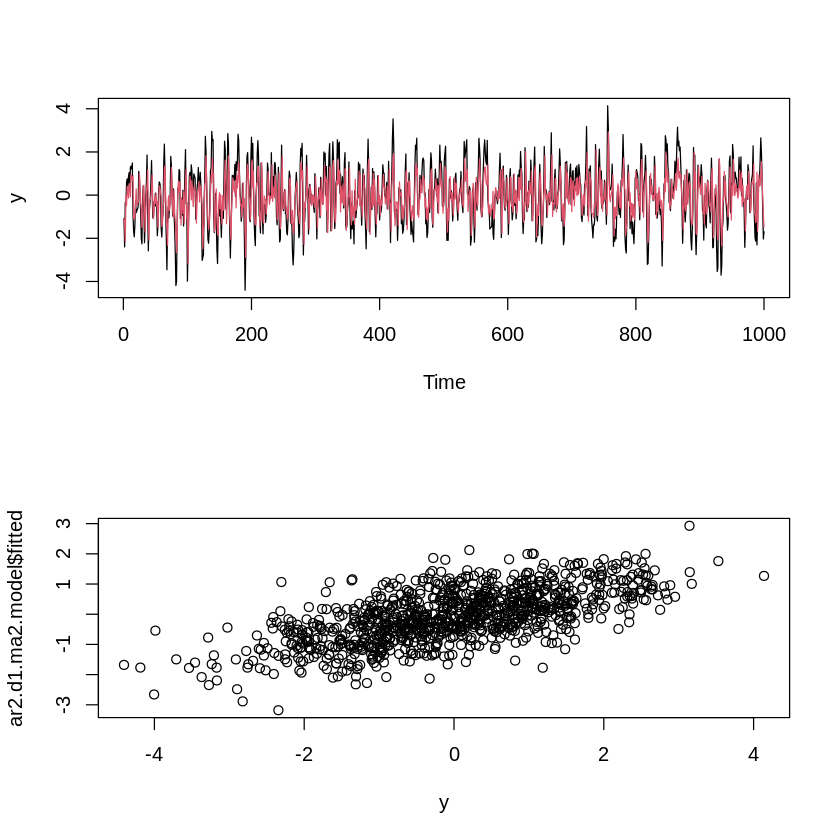

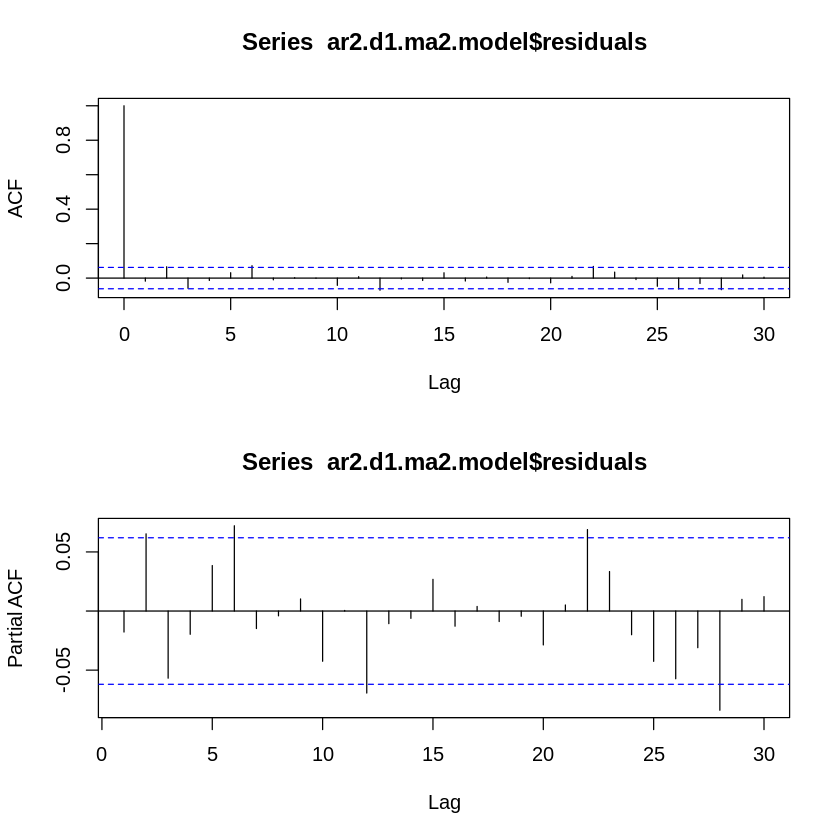

In [29]:
ar2.ma2.model = Arima(y, order = c(2, 0, 2))
plot (y, type = 'l')
lines(ar2.ma2.model$fitted, col = 2)
plot(y, ar2.ma2.model$fitted)
par(mfrow = c(2,1))
acf(ar2.ma2.model$residuals)
pacf(ar2.ma2.model$residuals)
ar2.d1.ma2.model = Arima(y, order = c(2, 1, 2))
plot(y, type = 'l')
lines(ar2.d1.ma2.model$fitted, col = 2)
plot(y, ar2.d1.ma2.model$fitted)
par (mf.row = c(2,1))
acf(ar2.d1.ma2.model$residuals)
pacf(ar2.d1.ma2.model$residuals)


Ниже приведен еще один, быстрый, способ сравнения моделей, который заключается в изучении корреляции спрогнозированных значений и фактических данных временного ряда.

In [30]:
cor(y, arl.mal.model$fitted)

[1] 0.6271288

In [32]:
cor(y, ar2.mal.model$fitted)

[1] 0.6485502

In [34]:
cor(y, ar2.ma2.model$fitted)

[1] 0.6547189

In [35]:
cor(y, ar2.d1.ma2.model$fitted)

[1] 0.6488141

Существенное улучшение наблюдается при переходе от модели ARIMA(1, 0, 1) к модели ARIMA(2, 0, 1) (первых два результата) — корреляция уменьшается с 0,3 до 0,47. Наряду с этим последующее увеличение сложности модели не вызывает заметного повышения корреляции. Это еще раз подтверждает полученный ранее результат — модель ARIMA(2, 0, 1), скорее всего, достаточно хорошо описывает поведение данных, и нет необходимости добавлять в нее дополнительные компоненты AR или МА для лучшей подгонки. Как бы там ни было, понять, насколько хорошо была выполнена подгонка, можно, сравнивая исходные коэффициенты (показанные здесь, хотя и скрытые ранее) с только что подобранными коэффициентами.

In [36]:
## Исходные коэффициенты
у = arima.sim(n = 1000, list(ar = c(0.8, -0.4), ma = c(-0.7)))
ar2.mal.model$coef


ar1         ar2         ma1   intercept 
 1.03988732 -0.45247193 -0.29020125 -0.02458411

Здесь наблюдаем хорошее соответствие между подобранными и исходными коэффициентами, используемыми для моделирования данных.
Настройка модели ARIMA вручную — это более сложный процесс, чем описано выше. На протяжении десятилетий практикующие специалисты по анализу данных занимались выработкой хорошо зарекомендовавших себя эмпирических правил выявления проблем подгонки модели, вызванных существованием слишком большого количества членов определенного вида, слишком высоким порядком вычисления разницы и т.п. Все они достаточно хорошо рассмотрены в руководстве, написанном профессором Университета штата Пенсильвания, которое доступно для просмотра онлайн (https://perma.cc/P9BK-764B).
Подгонка модели ARIMA вручную часто подвергается вполне обоснованной критике. Такая настройка — это довольно плохо регламентированный процесс, в котором точность получаемого результата зависит преимущественно от квалификации специалиста по анализу данных. Он может отнимать много времени, что зависит от выбранного способа получения конечного результата. Тем не менее это удачное и эффективное решение, которое на протяжении десятилетий использовалось при прогнозировании реальных процессов, но оно не настолько точное, как того хотелось бы.


#### Автоматическая подгонка модели.
В настоящее время мы можем отказаться от пошаговой подгонки модели вручную в пользу автоматического способа ее подбора. Выбор целевой модели осуществляется на основе самых разных информационных критериев (например, AIC, кратко описанного выше) с помощью функции auto.arima() пакета forecast:

In [38]:
est = auto.arima(demand [[ "Banking orders (2)"]],
stepwise = FALSE,  max.q = 9) ## это медленное решение, но оно обеспечивает более полный поиск


В этом примере функции передаются входные данные, выбор которых основан на результатах предыдущих исследований. В частности, мы указали наиболее подходящие с нашей точки зрения максимальные значения порядков процессов AR и МА, но программой была выбрана более простая модель, чем предполагалось, — полностью лишенная AR-составляющей. Тем не менее такая модель хорошо описывает исследуемые временные ряды, и для подбора более точной модели нам потребуется слишком долго и упорно изучать исходные данные, что в рассматриваемом случае совершенно неоправданно. Обратите внимание, что подогнанная вручную в соответствии с критерием AIC модель МА, описанная в предыдущем разделе, работает несколько лучше, чем автоматически выбранная модель, но при изучении графиков разница в их точности оказывается несущественной.
В качестве домашнего задания выполните задачи по отображению на общем графике смоделированных и спрогнозированных значений и определению невязок автоматически выбранной модели. Убедитесь в том, что невязки такой модели не нуждаются в устранении путем увеличения порядка одной из составляющих. Приведенный выше код ничем не отличается от используемого при описании моделей AR и МА ранее. Приведенные выше замечания в полной мере справедливы для случая прогнозирования данных — мы умышленно не будем останавливаться на рассмотрении этой темы, поскольку автоматически выбранная модель ARIMA мало чем отличается от модели МА, обсуждавшейся и применяемой для получения прогнозов ранее.


Давайте изучим результат выполнения функции auto.arima() для модели, полученной методом ручной подгонки в предыдущем разделе.

In [39]:
auto.model = auto.arima(у)
auto.model

Series: у 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.6986  -0.3764  -0.6224
s.e.  0.0493   0.0301   0.0480

sigma^2 = 0.9568:  log likelihood = -1395.57
AIC=2799.14   AICc=2799.18   BIC=2818.77

Здесь в функции auto.arima() не используются необязательные параметры, указывающие, с каких значений начинать выбор модели, и гарантирующие схождение к однажды полученному решению. Как видите, в отдельных случаях совершенно разные методы приводят к одному и тому же результату. В ручном способе при построении более сложных моделей мы ориентировались на функции ACF и PACF невязок более простых моделей, тогда как автоматический выбор, заключающийся в использовании функции auto, arima(), основан на задаче минимизации значения AIC. Конечно, учитывая факт получения исходных данных из процесса ARIMA, наш случай заведомо более простой, чем приходится рассматривать в реальных задачах.
Нет никакой гарантии того, что на практике автоматически выбранная модель будет обеспечивать такие же результаты, как и подогнанная вручную. Собираясь постоянно использовать функцию auto. arima() или любой другой инструмент автоматического выбора модели в анализе данных временных рядов, обязательно изучите документацию к ней, протестируйте ее на искусственных данных, а также изучите опыт работы с ней других специалистов по анализу данных.
Существует несколько общеизвестных сценариев, в которых функции такого рода работают не так, как ожидалось, но опытным специалистам известны обходные решения подобных проблем. В целом функция auto. arima() является хорошим, но далеко не идеальном инструментом. Подробное описание возможностей функции auto.arima() приведено в тематической главе онлайн-учебника, написанной разработчиком функции профессором Робом Хиндманом.
Выше продемонстрированы два разных способа настройки параметров модели: подгонка вручную методом Бокса-Дженкинса и автоматический выбор с помощью инструментов пакета forecast. Здесь мнения практикующих специалистов по анализу данных кардинально разделились: часть из них твердо убеждена в истинности ручную пошагового процесса, а остальные не менее яростно отстаивают автоматические инструменты настройки модели. Дискуссия все еще не завершена! В долгосрочной перспективе, вследствие стремительного роста популярности больших данных, инструменты автоматического исследования и подгонки моделей будут играть главную роль в анализе временных рядов больших наборов данных.


#### Векторная авторегрессия
В реальном мире часто приходится иметь дело сразу с несколькими параллельными временными рядами, предположительно связанными друг с другом. Ранее было показано, как правильно очищать и выравнивать параллельные данные, а здесь мы рассмотрим принципы использования и область применения таких временных рядов. Для этого нам понадобится сгенерировать модель AR(p) сразу для нескольких переменных. Такая модель должна учитывать факт влияния каждой из переменных на остальные и, в свою очередь, испытывать влияние со стороны остальных переменных — в модели отсутствует привилегированная величина у, выделяемая из остальных величин х. Напротив, подгонка модели выполняется на основе полностью симметричных данных. Обратите внимание на то, что в случае нестационарных данных анализ выполняется для разностей, а не исходных значений, как в рассматриваемых ранее моделях.
#### Экзогенные и эндогенные величины
С точки зрения статистических исследований переменные модели, которые оказывают влияние друг на друга, называются эндогенными — их значения описываются поведением модели. В противоположность им экзогенные переменные не находят объяснения в модели — они не описываются предположениями модели, а потому их значения принимаются такими, какими они есть, и не подвержены динамическим изменениям.
Поскольку каждый временной ряд предположительно предсказывает все остальные, а также себя, каждая переменная будет описываться одним уравнением.
Пусть у нас есть три временных ряда — обозначим их значения в момент времени t как y1,t, y2,t и y3,t. Тогда уравнения векторной авторегрессии (VAR) порядка 2 (с учетом двух временных сдвигов) можно записать следующим образом:
![image.png](attachment:image.png)

#### Умножение матриц
Обладая некоторыми познаниями в линейной алгебре, вы легко заметите, что предыдущие три уравнения намного проще выразить в матричной форме записи. Поступив так, вы представите модель VAR в похожем на модель AR виде. В матричной форме записи уравнения модели VAR имеют вид
![image-2.png](attachment:image-2.png)
где у и 0 — матрицы размером 3х1, а остальные  — матрицы размером 3x3.
Даже в таком простом примере видно, что количество параметров модели возрастет очень быстро. Например, в модели с р сдвигами и N переменными каждая переменная может принимать 1 + pN значений. Располагая N значениями для прогнозирования, мы получим N + pN2 переменных — число переменных растет со скоростью O(N2) относительно количества исследуемых временных рядов. Следовательно, использовать такую модель стоит не для анализа любых данных, представленных в виде временных рядов, а только в случаях, когда есть веские основания предполагать, что между временными рядами существуют некие взаимосвязи.
Модели VAR чаще всего применяются в эконометрике. Они часто подвергаются критике за отсутствие строгого обоснования, за исключением гипотезы о взаимном влиянии исследуемых величин. Именно по этой причине очень сложно оценить точность модели. Тем не менее модели VAR все еще востребованы, например, при оценке влияния переменных друг на друга. Их часто применяют для прогнозирования поведения переменных, когда знания предметной области не позволяют выявить тип существующих взаимоотношений. Иногда они также используются для определения того, насколько сильно расхождения в прогнозах обусловливаются “естественными” причинами.
Рассмотрим простой пример. Располагая известными данными об идентификационных номерах клиентов (UCI), спрогнозируем количество банковских переводов (2) не только по их собственным значениям, но и по значениям второго столбца набора данных (обратите внимание: прогнозирование второго столбца набора данных выполняется ввиду предположения о симметричности исследуемых величин). Сведения о переводах извлекаются для сектора управления дорожным движением. Тем самым обеспечивается относительная независимость источника информации по сравнению с предыдущим случаем, когда в обработку принимались данные о переводах для фискального сектора. Также предположим, что в каждом столбце содержатся все необходимые сведения о проводимых платежах, позволяющие определить направление будущих изменений.
Для определения используемых параметров обратимся к инструментам пакета vars, в частности к его методу VARselect().


In [41]:
install.packages("vars")
library(vars)
require(vars)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



In [42]:
VARselect(demand[, 11:12, with = FALSE], lag.max=4, type = "const")

,1,2,3,4
AIC(n),3.975854e+01,3.967373e+01,3.957496e+01,3.968281e+01
HQ(n),3.984267e+01,3.981395e+01,3.977126e+01,3.993521e+01
SC(n),3.997554e+01,4.003540e+01,4.008130e+01,4.033382e+01
FPE(n),1.849280e+17,1.700189e+17,1.542863e+17,1.723729e+17


Как видим, функция предоставляет широкий выбор информационных критериев. Обратите внимание на использование атрибута const, обеспечивающего учет компонента ненулевого математического ожидания. Вместо него можно было задать дрейфовый компонент, их оба или ни одного, хотя вариант “const” кажется наиболее подходящим для наших данных. Начнем подгонку модели с учета трех сдвигов и посмотрим, какой результат будет получен.



VAR Estimation Results:

Estimated coefficients for equation Banking.orders..2.: 
Call:
Banking.orders..2. = Banking.orders..2..l1 + Banking.orders..3..l1 + Banking.orders..2..l2 + Banking.orders..3..l2 + Banking.orders..2..l3 + Banking.orders..3..l3 + const 

Banking.orders..2..l1 Banking.orders..3..l1 Banking.orders..2..l2 
        -2.134351e-01         -1.070454e+00         -3.332587e-02 
Banking.orders..3..l2 Banking.orders..2..l3 Banking.orders..3..l3 
         6.778114e-01         -2.378322e-01          8.626345e-01 
                const 
         1.055717e+05 


Estimated coefficients for equation Banking.orders..3.: 
Call:
Banking.orders..3. = Banking.orders..2..l1 + Banking.orders..3..l1 + Banking.orders..2..l2 + Banking.orders..3..l2 + Banking.orders..2..l3 + Banking.orders..3..l3 + const 

Banking.orders..2..l1 Banking.orders..3..l1 Banking.orders..2..l2 
         9.985195e-02          4.954869e-01          3.819053e-02 
Banking.orders..3..l2 Banking.orders..2..l3 Banking.

Warning message in demand$"Banking orders (2)" - fitted(est.var)[, 1]:
“longer object length is not a multiple of shorter object length”
Warning message in demand$"Banking orders (3)" - fitted(est.var)[, 2]:
“longer object length is not a multiple of shorter object length”


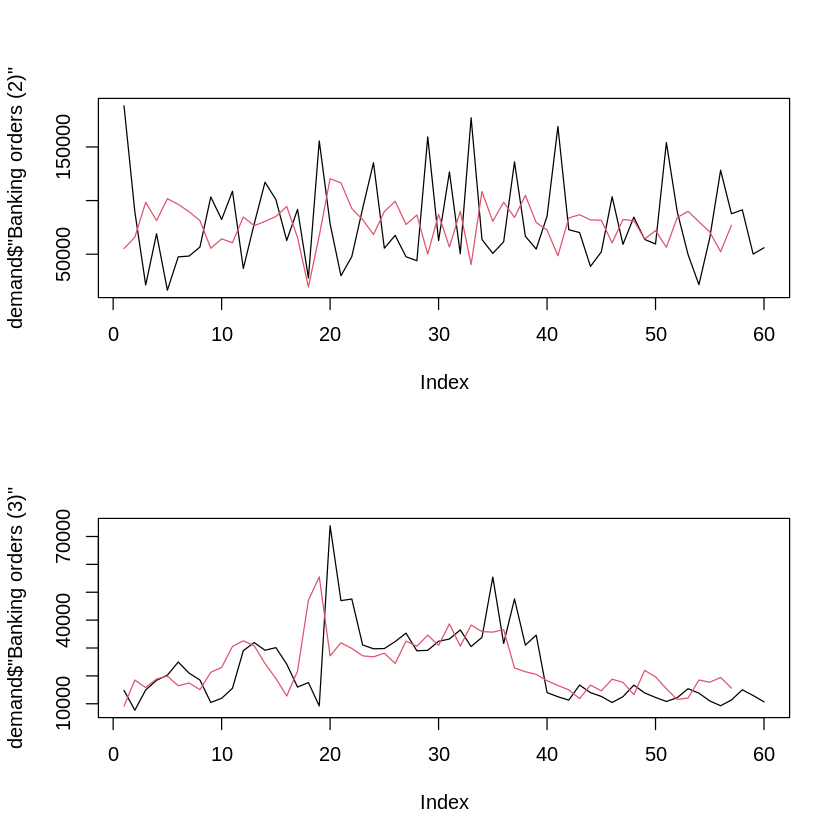

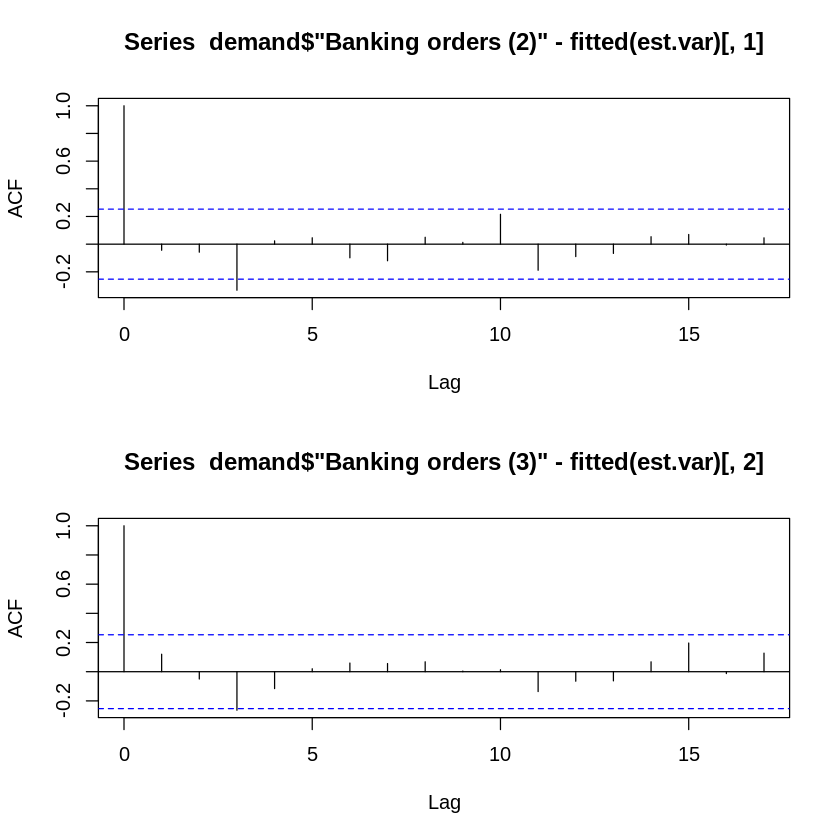

In [43]:
est.var <- VAR(demand[, 11:12, with = FALSE], p=3, type="const")
est.var
par(mfrow = c(2, 1))
plot(demand$'Banking orders (2)', type = "l")
lines (fitted(est.var) [, 1], col = 2)
plot(demand$'Banking orders (3)', type = "l")
lines (fitted(est.var) [, 2], col = 2)
par(mfrow = c(2, 1))
acf(demand$'Banking orders (2)' - fitted(est.var) [, 1])
acf(demand$'Banking orders (3)' - fitted(est.var) [, 2])


Результатом выполнения кода будут графики, показанные на рисунках. Функции ACF недостаточно четко указывают на отсутствие автокорреляции в невязках, как того хотелось бы, поэтому дополнительно проведем тест портманто (Portmanteau test) для определения последовательной корреляции, воспользовавшись методом vars пакета serial.test(). Этот тест выполняется так же, как и тест на последовательную корреляцию в одномерных данных, с которым вам уже доводилось встречаться.

In [44]:
serial.test(est.var, lags.pt = 8, type="PT.asymptotic")



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object est.var
Chi-squared = 20.463, df = 20, p-value = 0.4293

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object est.var
Chi-squared = 20.463, df = 20, p-value = 0.4293



Столь высокое значение p не позволяет отвергнуть нулевую гипотезу об отсутствии последовательной корреляции в невязках. Это еще раз доказывает состоятельность модели в описании данных.
В ходе анализа одномерных данных мы изучили несколько моделей, пока не пришли к ARMA и ARIMA. Справедливым будет вопрос о существовании модели VARIMA для многомерных временных рядов. Если она существует, то такая модель вряд ли найдет широкое применение ввиду высокой точности и сложности модели VAR. Стоит заметить, что на практике — в подавляющем большинстве производственных и научных решений — применяется модель VAR, а не VARIMA.
Родственным классом векторной авторегрессионной модели выступает CVAR (Cointegrated Vector Autoregression), или модель коинтегрированной векторной авторегрессии. Она находит применение в случаях, когда нестационарными являются отдельные временные ряды, но линейная их комбинация остается стационарной для исходных значений, а не только разностей.
![image.png](attachment:image.png)

Рис. 5.12. Вверху показаны фактические (сплошная линия) и прогнозные (пунктирная линия) данные о количестве банковских переводов (2), а внизу приведены такие же графики для банковских переводов (3). По всей видимости, верхний график демонстрирует более точный прогноз, поскольку в нем “приглушенная” кривая прогнозных значений довольно плавно повторяет кривую реальных данных, в то время как на нижнем графике прогнозные данные предсказывают события несколько раньше, чем они происходят. Это говорит о том, что ряд банковских переводов (2) опережает ряд банковских переводов (3). Следовательно, ряд банковских переводов (2) можно использовать для прогнозирования переводов, производимых сектором управления дорожным движением, но не наоборот — по крайней мере не с такой высокой точностью

![image-2.png](attachment:image-2.png)
Рис. 5.13. Автокорреляционные функции невязок обоих временных рядов. В каждом временном ряду наблюдается значительная автокорреляция ошибок в смещении 3, которую невозможно полностью учесть в модели

#### Виды статистических моделей
Существует много других видов статистических моделей, предназначенных для описания временных рядов. Некоторые из них расширяют модель ARIMA, в то время как в остальных принимаются другие базовые предположения о временной динамике, не такие, как в ARIMA. В этом разделе мы кратко обсудим некоторые из наиболее часто используемых и известных статистических моделей, применяемых для анализа временных рядов.
#### Сезонная модель ARIMA
Сезонная модель ARIMA (SARIMA) предполагает мультипликативную сезонность. Исходя из такого определения модель SARIMA можно описать как ARIMA(p, d, q)(P, D, Q)m. В ней постулируется, что сезонное поведение можно рассматривать как процесс ARIMA, где т указывает количество временных шагов в сезонном цикле. Важно знать, что модель SARIMA предполагает, что данные в смежных временных точках оказывают влияние друг на друга либо в пределах одного сезона, либо в разные сезоны, и такое поведение можно описать отдельно с помощью таких же методов, которые применяются в модели ARIMA.
Подгонка модели SARIMA выполняется несколько сложнее, чем модели ARIMA именно из-за необходимости учета сезонных изменений. К счастью, функция auto.arima() пакете forecast справляется с этой задачей так же просто, как со стандартной задачей подбора модели ARIMA. Как указывалось ранее, не обладая достаточными познаниями, лучше обратиться к автоматическому способу выбора параметров модели. Ручной подгонкой автоматически подобранной модели можно заниматься только в случае глубокого понимания всех тонкостей процесса.
#### ARCH, GARCH и родственные им модели
Под аббревиатурой “ARCH” скрывается название “Autoregressive Conditional Heterosckedasticity” (Авторегрессионная условная гетероскедастичность). За редким исключением эта модель используется только в финансовой отрасли. Но она часто описывается в руководствах по анализу временных рядов, поэтому заслуживает отдельного упоминания. Этот отдельный класс моделей происходит из наблюдений, утверждающих, что цены на акции не характеризуются постоянной дисперсией, а сама дисперсия оказывается авторегрессионной по отношению к более ранним дисперсиям (например, дни высокой волатильности на фондовой бирже следуют кластерами). В таких моделях авторегрессионным процессом выступает дисперсия, а не сами исходные данные.
#### Модели иерархических временных рядов
Иерархические временные ряды широко распространены в реальном мире, хотя и не представляются в явном виде как таковые. Можно легко представить ситуации, при описании которых они будут востребованы.
• Общий месячный спрос на продукцию компании в денежном выражении, впоследствии пересчитываемый в единицах складского учета (SKU).
• Еженедельные данные об общих электоральных предпочтениях населения с разбивкой по демографическим категориям (перекрывающимся или не перекрывающимся), например, женщины в сравнении с мужчинами или латиноамериканцы в сравнении с афроамериканцами.
• Общее количество туристов, прибывающих в ЕС ежедневно, по сравнению с количеством туристов, прибывающих отдельно в каждую страну — член ЕС.
Одним из самых удобных инструментов обработки иерархических временных рядов считается пакет hts языка R. Он может применяться как для визуализации данных иерархических временных рядов, так и для прогнозирования.
Прогнозы создаются на основе самых разных методик, поддержка которых исторически была включена в этот пакет.
• После получения прогнозов самого низкого уровня (наиболее индивидуализированные) они обобщаются для создания прогнозов более высокого уровня.
• После получения прогнозов самого высокого уровня составляются прогнозы более низкого уровня, для чего рассчитывается долевое участие каждого из них в общей совокупности. Эта методика обычно менее точная при низкоуровневом прогнозировании, хотя ее можно несколько улучшить, спрогнозировав изменение пропорций совокупности во времени.
• Придерживаясь “среднего” прогноза (в моделях с многоуровневой иерархией), получить лучшие прогнозы для внутренних уровней иерархии с помощью оптимальных методик. Для получения остальных прогнозов опускаться или подниматься по иерархии относительно таких точных прогнозов, задействовав наиболее подходящие модели.
По большому счету, золотой стандарт использования пакета hts заключается в построении прогнозов для любых уровней иерархии, независимо от остальных ее уровней, с последующим обобщением для согласования метода, описанного Хиндманом (https: / /perma. cc/G4EG-6SMP).
Многие из рассматриваемых выше статистических моделей часто применяются в задачах прогнозирования временных рядов самых разных уровней. Анализ иерархических взаимоотношений между отдельными составляющими процесса обычно выносится в отдельный этап моделирования.


### Преимущества и недостатки статистических методов анализа временных рядов
Принимая решение об использовании одной из описанных выше статистических моделей для анализа временных рядов, обращайте внимание на ее преимущества и недостатки.
Преимущества
• Простота и прозрачность модели предполагают использование понятных параметров.
• Описание модели простыми математическими выражениями позволяет рассматривать ее свойства с помощью предельно строгих статистических методов.
• Применяя статистические модели к относительно небольшим наборам данных, можно получить такие же хорошие результаты, как и в случае больших данных.
• Простые модели и их модификации работают очень хорошо даже в сравнении со сложными моделями, применяемыми в машинном обучении. Таким образом, вы получаете хорошую точность без опасности переобучения.
• Правильно подобранные автоматизированные методики определения порядка
модели и оценки их параметров существенно упрощают прогнозирование.
Недостатки
• Относительная простота модели не позволяет ей иметь высокую точность при обработке больших наборов данных. Работая с очень большими наборами данных, лучше обратиться к сложным моделям машинного обучения и алгоритмам нейронных сетей.
• Статистические модели “заточены” на оценку математического ожидания распределения, а не самого распределении. Конечно, они позволяют рассчитать дисперсию выборки и другие статистические показатели, указывающие на неопределенность прогнозов, но на базовом уровне модель располагает лишь ограниченными возможностями по выявлению неопределенности во всех комбинациях параметров, которые рассматриваются при выборе модели.
• По определению такие модели не созданы для описания динамики нелинейных процессов и плохо подходят для анализа данных с преимущественно нелинейными зависимостями.